# Modeling HIV infection

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

In [1]:
# import functions from modsim
import sys
sys.path.append('..\\..\\ModSimPy_Directory')
from ModSimPy_Functions.modsim import *

import pandas as pd

During the initial phase of HIV infection, the concentration of the virus in the bloodstream typically increases quickly and then decreases.
The most obvious explanation for the decline is an immune response that destroys the virus or controls its replication.
However, at least in some patients, the decline occurs even without any detectable immune response.

In 1996 Andrew Phillips proposed another explanation for the decline ("Reduction of HIV Concentration During Acute Infection: Independence from a Specific Immune Response", available from <https://people.math.gatech.edu/~weiss/uploads/5/8/6/1/58618765/phillips1996.pdf>).

Phillips presents a system of differential equations that models the concentrations of the HIV virus and the CD4 cells it infects.
The model does not include an immune response; nevertheless, it demonstrates behavior that is qualitatively similar to what is seen in patients during the first few weeks after infection.

His conclusion is that the observed decline in the concentration of HIV might not be caused by an immune response; it could be due to the dynamic interaction between HIV and the cells it infects.

In this notebook, we'll implement Phillips's model and consider whether it does the work it is meant to do.

## The Model

The model has four state variables, `R`, `L`, `E`, and `V`.  

Here are the initial conditions for the variables.

In [2]:
init = pd.Series(dict(R=200, L=0, E=0, V=4e-7))

The behavior of the system is controlled by 9 parameters.
That might seem like a lot, but they are not entirely free parameters; their values are constrained by measurements and background knowledge (although some are more constrained than others).
Here are the values from Table 1.

Note: the parameter $\rho$ (the Greek letter "rho") in the table appears as $p$ in the equations.  Since it represents a proportion, we'll use $p$.

In [3]:
gamma = 1.36
mu = 1.36e-3
tau = 0.2
beta = 0.00027
p = 0.1
alpha = 3.6e-2
sigma = 2
delta = 0.33
pi = 100

Here's a system object with the initial conditions and the duration of the simulation (120 days).
Normally we would store the parameters in the system object, but the code will be less cluttered if we leave them as global variables.

In [4]:
system = dict(init=init,
                t_end=120,
                num=481)

#### Part 1
Let's try to understand what Phillips is modeling here. As you work through the paper, you may need to look up a couple words or concepts to make sure you understand the physical meaning.  You don't need to understand every sentence, but we want to get the main idea of his argument and to understand the method.

First, write out the 4 main variables and define them; then do the same with the parameters.  Recognize that when the author refers to "CD4 lymphocytes" (a type of white blood cell) and "cells", he is referring to the same thing:

#### Note the meaning of the variables here

R: 

L: 

E: 

V: 

#### Note the meaning of the parameters here

gamma:

mu:

tau:

beta:

p:

alpha: 

sigma:

delta:

pi: 

Finally, write out the meaning of the differential equations in plain English.  I want you to see that these equations have a meaning: they were derived not from some mathematical principle, but from observation.  I'll do the first one:

$$\frac {dR}{dt} = \Gamma \tau -\mu R - \beta R V$$

The first term $\Gamma \tau$ multiplies the rate of normal CD4 cell production (how many new cells are created?) and multiples it by the proportion of those cells that are "activated."  So the product $\Gamma \tau$ is the rate of production of activated CD4 cells.   The second terms is the normal death rate of these cells multiplied by the number of R cells: that is the rate of death of activated CD4 cells.  The final term is rate at which CD4 cells are infected by a virion times the number of CD4 cells times the number of virions: that is, the rate at which CD4 cells are infected.

The "translation" of the equation, then, is something like this:

The rate of change of the number of active, uninfected CD4 cells (i.e. R-type cells) is equal to:
-    the rate of creation of R-type cells

-    MINUS the rate of death of R-type cells

-    MINUS the rate of the transformation of R-type cells into infected cells

You can see that there is no math magic there: the equation represents a fairly intuitive  idea of what might control the population of R-type cells.  It is a *model* of the population of R-type cells. Now write out the "translation" of the other three equations:

#### Write out the translations of the differential equations here

dL/dt:

dE/dt:

dV/dt:

#### Part 2

Use the equations in the paper to write a slope function that takes a `State` object with the current values of `R`, `L`, `E`, and `V`, and returns their derivatives in the corresponding order.

In [5]:
# Define your slope function here
def slope_func(t, state, system):
    R, L, E, V = state
        
    dRdt = gamma * tau - mu * R - beta * R * V
    dLdt = p* beta * R * V - mu * L - alpha * L
    dEdt = (1-p)* beta * R * V + alpha * L - delta * E
    dVdt = pi * E - sigma * V
    
    
    return dRdt, dLdt, dEdt, dVdt

Test your slope function with the initial conditions.
The results should be approximately

```
-2.16e-08, 2.16e-09, 1.944e-08, -8e-07
```

In [6]:
# Test your slope function here
slope_func(0,init,system)

(-2.1599999999999998e-08, 2.16e-09, 1.9439999999999997e-08, -8e-07)

#### Part 3

In the first cell, use `run_solve_ivp` to simulate the system of equations.

In the next few cells after that, plot the results on the same scale as the figures in the paper.

Compare your results to the results in the paper.  Are they consistent?  Note that in the results in the paper, each plot has to y-axis labels for the different variables plotted.  Be sure you are looking at the correct labels as you compare the plots.

In [7]:
# Use run_solve_ivp
results, details = run_solve_ivp(system, slope_func)

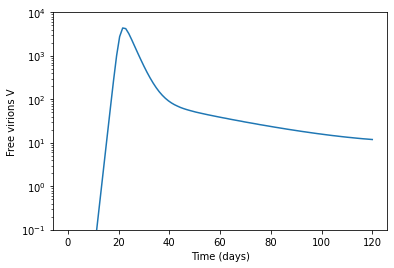

In [14]:
results.V.plot(label='V', xlabel='Time (days)',
         ylabel='Free virions V',
         logy=True,
         ylim=[0.1, 1e4]);

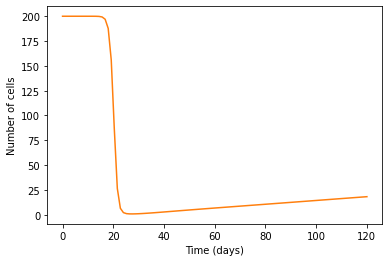

In [15]:
results.R.plot(label='R', color='C1',
               xlabel='Time (days)', 
               ylabel='Number of cells');

<AxesSubplot:xlabel='Time (days)', ylabel='Number of cells'>

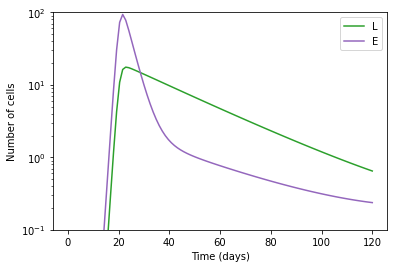

In [16]:
results.L.plot(color='C2', label='L',legend=True)
results.E.plot(color='C4', label='E',
               xlabel='Time (days)',
               ylabel='Number of cells',
               logy=True,legend=True,
               ylim=[0.1, 100])

#### Part 4

What is interesting about the model presented by Phillips (i.e. what is the main point of the paper)?  What are the strengths of the model?  What are the weaknesses?